# Data Wrangling
Peraparing the data for work in Python.

1. Downloaded the excel file.
2. Opened and saved as a `*.csv` within the `data` folder.

In [2]:
# Importing needed packages, use of these packages for this
# purpose is ubiquitous.
import numpy
import pandas
import matplotlib

In [3]:
# Enable inline view (a Jupyter Notebook specific function.)
# of the plots generated by matplotlib.
%matplotlib notebook

In [4]:
# Define the data path to be loaded.
data_path = "data/InfinitePlanes_sampleSet.csv"

In [5]:
# Use the pandas library to load the dataset as a dataframe object.
lance_data_frame = pandas.read_csv(data_path)

In [6]:
# Check the data, .head() shows the first few entries by default.
lance_data_frame.head()

,dist (nm),theory: Energy/area Kt/nm^2,Program: Energy/area Kt/nm^2
0,1,-158.140118,0.019100
1,2,-9.883871,0.007850
2,3,-1.955724,0.004210
3,4,-0.628294,0.002000
4,5,-0.268234,0.000678


In [7]:
# Data can be accessed from pandas dataframes by index.
lance_data_frame.iloc[:, 1].head()

0   -158.140118
1     -9.883871
2     -1.955724
3     -0.628294
4     -0.268234
Name: theory: Energy/area Kt/nm^2, dtype: float64

In [8]:
# Data can also be accessed from pandas dataframes by
# the name of the column.
lance_data_frame['dist (nm)'].head()

0    1
1    2
2    3
3    4
4    5
Name: dist (nm), dtype: int64

# Plotting the data
Often times getting data into a pandas dataframe is the hardest
part of a project.

<IPython.core.display.Javascript object>


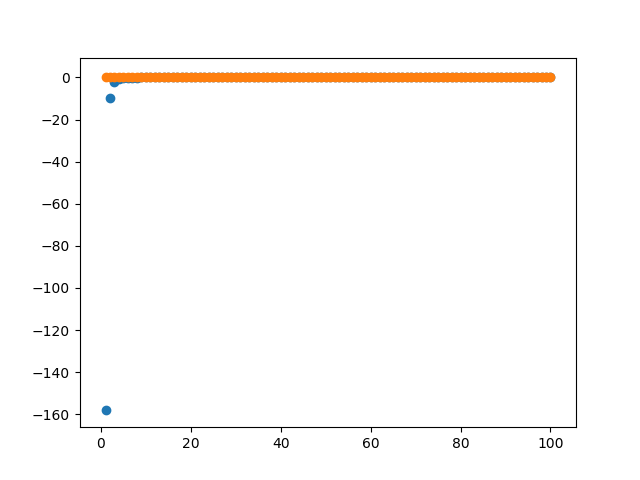

In [9]:
# Generate a figure object that will hold whatever axes and
# other plot objects we want.
fig = matplotlib.pyplot.figure()

# Generate a scatter plot.
matplotlib.pyplot.scatter(
    x=lance_data_frame['dist (nm)'],
    y=lance_data_frame['theory: Energy/area Kt/nm^2']
)

# Add more data to the plot.
matplotlib.pyplot.scatter(
    x=lance_data_frame['dist (nm)'],
    y=lance_data_frame['Program: Energy/area Kt/nm^2']
)

matplotlib.pyplot.show()

## Adding line plots
Since the above plot is not very usefull, let us add some lines.

<IPython.core.display.Javascript object>


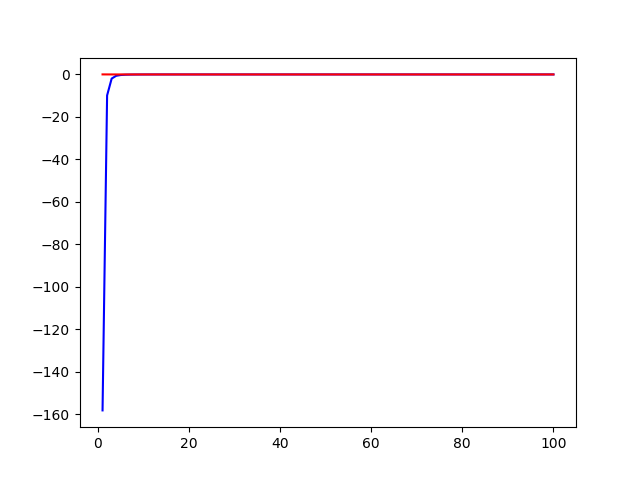

In [10]:
# Generate a figure object that will hold whatever axes and
# other plot objects we want.
fig = matplotlib.pyplot.figure()

# Generate a plot. This time we will use a different notation.
# This function accepts inputs in groups of threes, that is
# a list of x values, a list of y values and then a marker
# to indicate what type of point or line should be drawn.
matplotlib.pyplot.plot(
    lance_data_frame['dist (nm)'],
    lance_data_frame['theory: Energy/area Kt/nm^2'],
    'b-', # A blue line, the default value.
    lance_data_frame['dist (nm)'],
    lance_data_frame['Program: Energy/area Kt/nm^2'],
    'r-'  # A red line.
)

matplotlib.pyplot.show()

## Examining Difference Plots
We can make dumb plots like the above in excel. Let us test if
the default settings in Python solve the more interesting issue here.

### Generate derivative columns
While we could do this math 'in place' within the plotting function, that would likely be a bit confusing.
Instead, I will just generate some new columns.

In [11]:
# A very literal name for theory minus program.
lance_data_frame['theory-program'] = (lance_data_frame['theory: Energy/area Kt/nm^2'] - 
    lance_data_frame['Program: Energy/area Kt/nm^2'])

# Examine the new column.
lance_data_frame['theory-program'].head()

0   -158.159218
1     -9.891721
2     -1.959934
3     -0.630294
4     -0.268912
Name: theory-program, dtype: float64

<IPython.core.display.Javascript object>


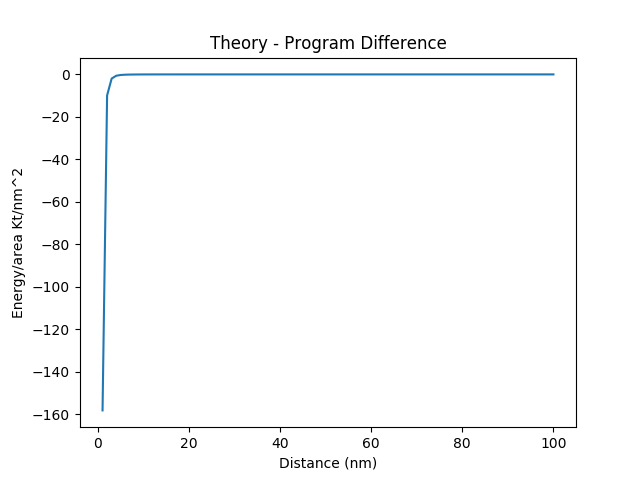

In [12]:
# Generate a figure object that will hold whatever axes and
# other plot objects we want.
fig = matplotlib.pyplot.figure()

# Generate a plot.
matplotlib.pyplot.plot(
    lance_data_frame['dist (nm)'],
    lance_data_frame['theory-program']
)

# Since this plot tells me nothing, let us instead learn how to
# add plot titles and axes labels.
matplotlib.pyplot.xlabel("Distance (nm)")
matplotlib.pyplot.ylabel("Energy/area Kt/nm^2")
matplotlib.pyplot.title("Theory - Program Difference")

matplotlib.pyplot.show()

## Another Derivative Column
I am in a meeting and having trouble remembering exactly what you wanted to plot.
I seem to recall:

$$
\frac{t - p}{t}
$$

As a goal.

So let us generate that column and subsequent plot...

In [19]:
lance_data_frame['Normalized Theory Difference'] = (lance_data_frame['theory-program'] / 
                                                    lance_data_frame['theory: Energy/area Kt/nm^2'])
lance_data_frame['Normalized Theory Difference'] = lance_data_frame['Normalized Theory Difference'].abs()

<IPython.core.display.Javascript object>


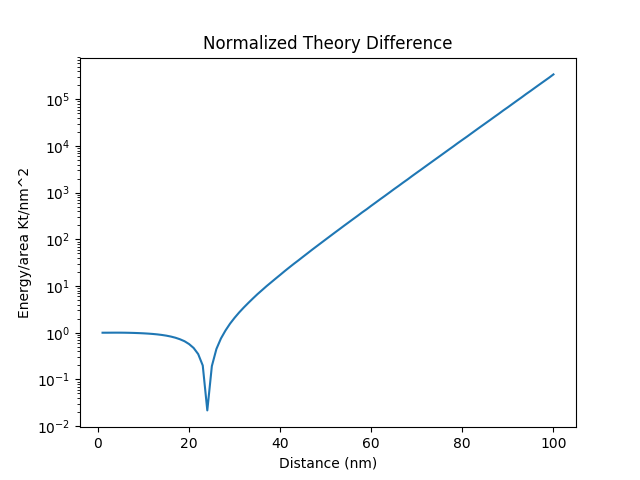

In [27]:
# Generate a figure object that will hold whatever axes and
# other plot objects we want.
# fig = matplotlib.pyplot.figure()

fig, ax = matplotlib.pyplot.subplots()

ax.set(yscale="log")

# Generate a plot.
matplotlib.pyplot.plot(
    lance_data_frame['dist (nm)'],
    lance_data_frame['Normalized Theory Difference']
)

# Since this plot tells me nothing, let us instead learn how to
# add plot titles and axes labels.
matplotlib.pyplot.xlabel("Distance (nm)")
matplotlib.pyplot.ylabel("Energy/area Kt/nm^2")
matplotlib.pyplot.title("Normalized Theory Difference")
# fig.set(xscale="log")
matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


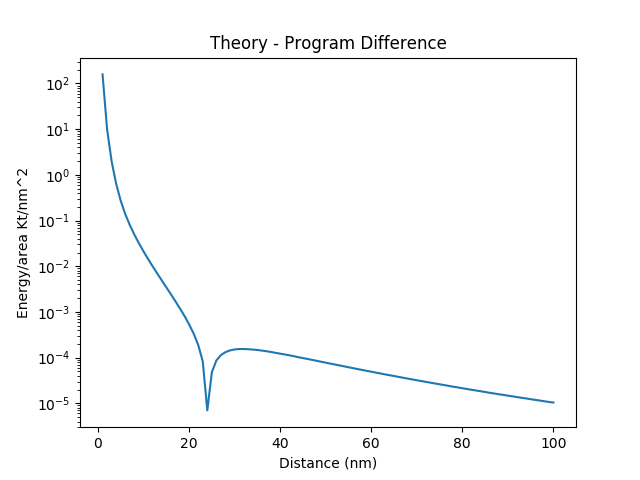

In [29]:
# Generate a figure object that will hold whatever axes and
# other plot objects we want.
fig, ax = matplotlib.pyplot.subplots()

ax.set(yscale="log")

# Generate a plot.
matplotlib.pyplot.plot(
    lance_data_frame['dist (nm)'],
    abs(lance_data_frame['theory-program'])
)

# Since this plot tells me nothing, let us instead learn how to
# add plot titles and axes labels.
matplotlib.pyplot.xlabel("Distance (nm)")
matplotlib.pyplot.ylabel("Energy/area Kt/nm^2")
matplotlib.pyplot.title("Theory - Program Difference")

matplotlib.pyplot.show()

<IPython.core.display.Javascript object>


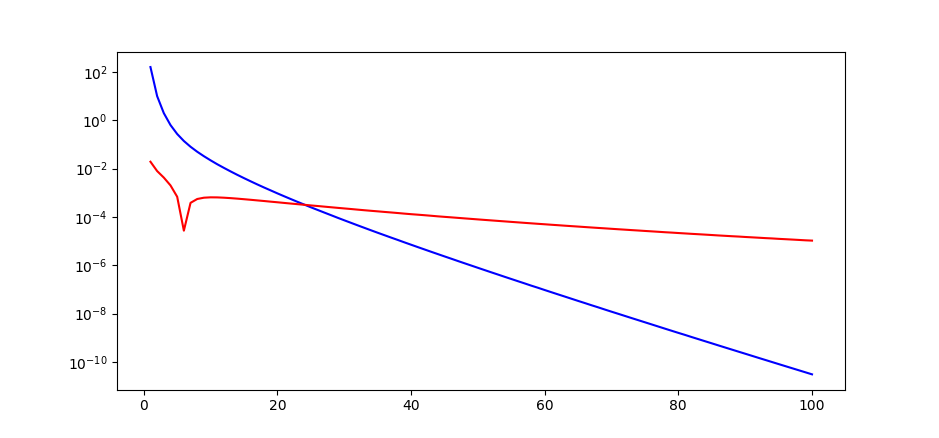

In [31]:
# Generate a figure object that will hold whatever axes and
# other plot objects we want.
fig, ax = matplotlib.pyplot.subplots()

ax.set(yscale="log")

# Generate a plot. This time we will use a different notation.
# This function accepts inputs in groups of threes, that is
# a list of x values, a list of y values and then a marker
# to indicate what type of point or line should be drawn.
matplotlib.pyplot.plot(
    lance_data_frame['dist (nm)'],
    abs(lance_data_frame['theory: Energy/area Kt/nm^2']),
    'b-', # A blue line, the default value.
    lance_data_frame['dist (nm)'],
    abs(lance_data_frame['Program: Energy/area Kt/nm^2']),
    'r-'  # A red line.
)

matplotlib.pyplot.show()